In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/predictive_maintenance.csv")

In [ ]:
print("Shape:", df.shape)

Shape: (10000, 10)


In [ ]:
display(df.head())

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
print("\nColumns:\n", df.columns)


Columns:
 Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


In [ ]:
print("\nInfo:")
display(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


None

In [ ]:
print("\nDescribe (numeric):")
display(df.describe())


Describe (numeric):


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
# Split numeric vs categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Numeric columns: ['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']
Categorical columns: ['Product ID', 'Type', 'Failure Type']


In [ ]:
print("\nDescribe (categorical):")
display(df.describe(include=["object", "category"]))


Describe (categorical):


,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,L57163,L,No Failure
freq,1,6000,9652


In [ ]:
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]

if len(missing) == 0:
    print("Missing Values: None")
else:
    missing.plot(kind="bar")
    plt.title("Missing Values Count per Column")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Missing Values: None


<Figure size 640x480 with 0 Axes>

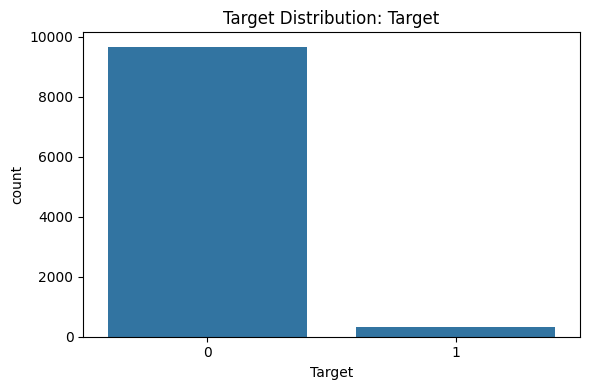

In [ ]:
#Target distribution
possible_targets = ["Target","Failure Type"]
target_col = None
for c in df.columns:
    if c in possible_targets or c.lower() in [t.lower() for t in possible_targets]:
        target_col = c
        break

if target_col is not None:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[target_col])
    plt.title(f"Target Distribution: {target_col}")
    plt.tight_layout()
    plt.show()
else:
    print("\n(No obvious target column detected for target distribution plot yet.)")


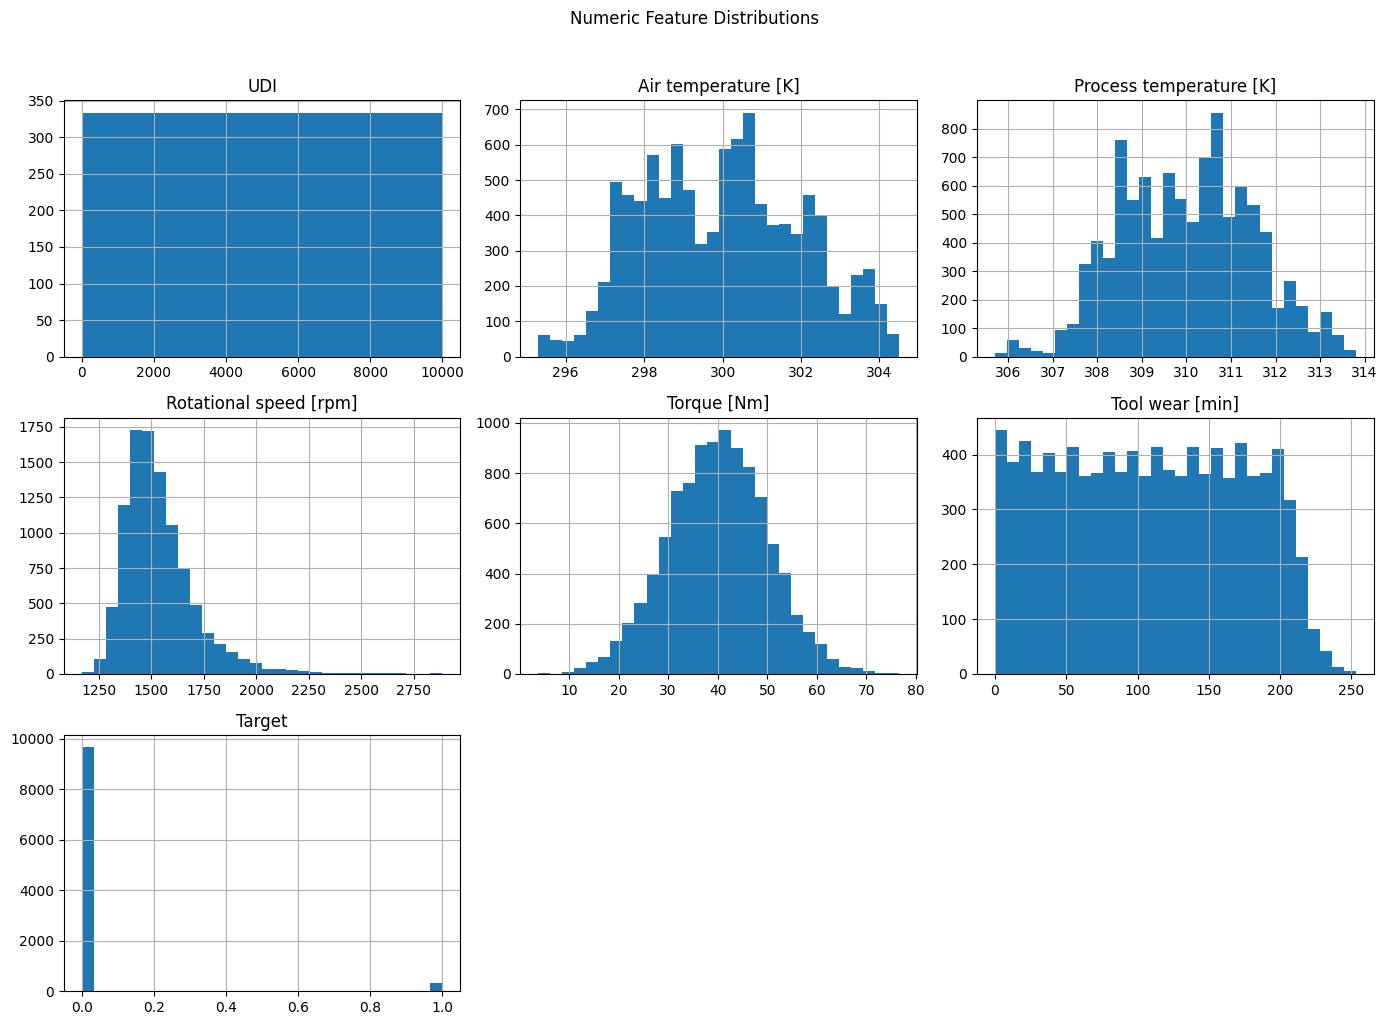

In [ ]:
# Numeric distributions
if len(num_cols) > 0:
    df[num_cols].hist(figsize=(14, 10), bins=30)
    plt.suptitle("Numeric Feature Distributions", y=1.02)
    plt.tight_layout()
    plt.show()

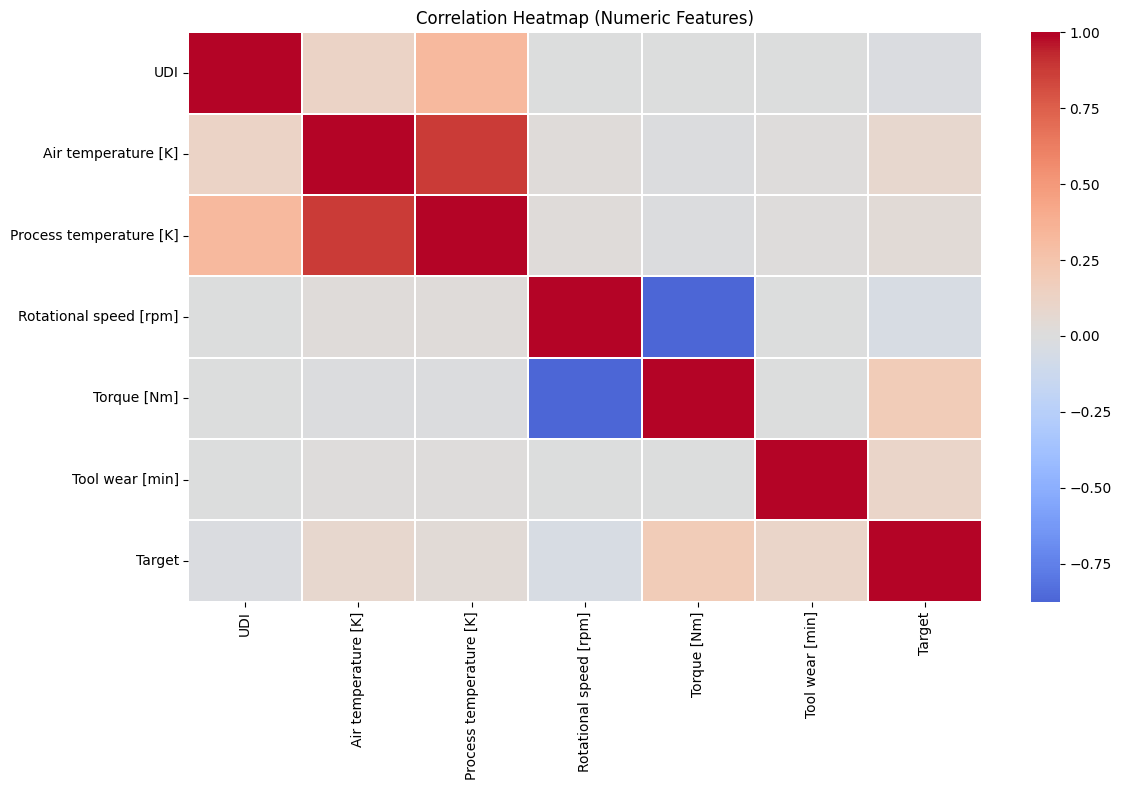

In [ ]:
# Correlation heatmap for numeric
if len(num_cols) >= 2:
    plt.figure(figsize=(12, 8))
    corr = df[num_cols].corr()
    sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.3)
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.tight_layout()
    plt.show()

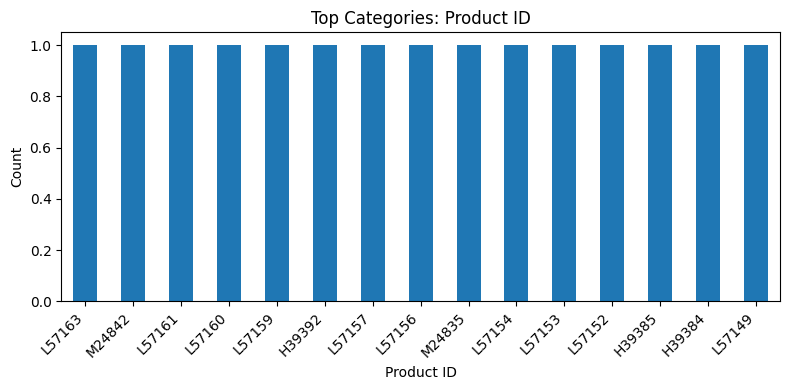

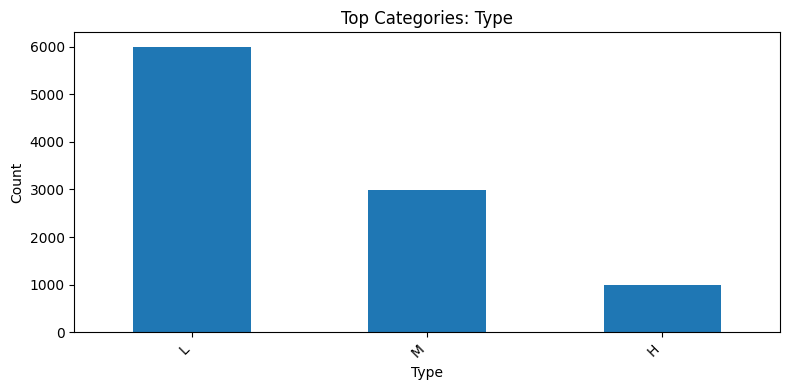

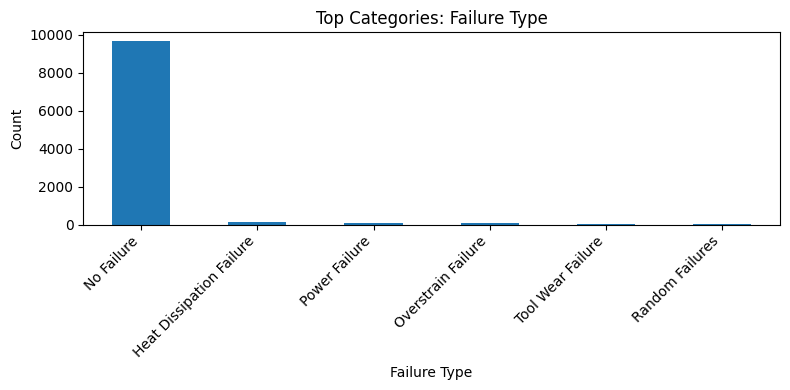

In [ ]:
#Categorical counts
for c in cat_cols[:6]:
    plt.figure(figsize=(8, 4))
    df[c].value_counts().head(15).plot(kind="bar")
    plt.title(f"Top Categories: {c}")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [ ]:
# Check missing values
print("\nMissing values BEFORE:")
display(df.isna().sum())



Missing values BEFORE:


,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
#if missing values exist skewed=median,else=mean,categorical=mode

from scipy.stats import skew

for col in num_cols:
    if df[col].isna().sum() > 0:
        col_skew = skew(df[col].dropna())
        if abs(col_skew) > 1:
            df[col].fillna(df[col].median(), inplace=True)
            print(f"{col}: filled with MEDIAN (skew={col_skew:.2f})")
        else:
            df[col].fillna(df[col].mean(), inplace=True)
            print(f"{col}: filled with MEAN (skew={col_skew:.2f})")

for col in cat_cols:
    if df[col].isna().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"{col}: filled with MODE ({mode_val})")

In [ ]:
# Check missing values after
print("\nMissing values AFTER:")
display(df.isna().sum())


Missing values AFTER:


,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
#check class distribution
from collections import Counter

y = df[target_col]
print("\nClass distribution BEFORE balancing:")
print(Counter(y))


Class distribution BEFORE balancing:
Counter({0: 9661, 1: 339})


In [ ]:
#Separate features & target
X = df.drop(columns=[target_col])

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Encode Categorical Features before smote
df_encoded = df.copy()

num_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_encoded.select_dtypes(exclude=[np.number]).columns.tolist()

print("Categorical columns to encode:", cat_cols)

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

print("Categorical features converted to numerical")
display(df_encoded.head())

Categorical columns to encode: ['Product ID', 'Type', 'Failure Type']
Categorical features converted to numerical


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,7003,2,298.1,308.6,1551,42.8,0,0,1
1,2,1003,1,298.2,308.7,1408,46.3,3,0,1
2,3,1004,1,298.1,308.5,1498,49.4,5,0,1
3,4,1005,1,298.2,308.6,1433,39.5,7,0,1
4,5,1006,1,298.2,308.7,1408,40.0,9,0,1


In [ ]:
ids = ["UDI", "Product ID"]
df_encoded.drop(columns=ids, inplace=True)

print("Dropping ID-like columns:", ids)

Dropping ID-like columns: ['UDI', 'Product ID']


In [ ]:
#Apply SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

target_col = target_col

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

print("Class distribution BEFORE SMOTE:")
print(Counter(y))

minority_ratio = min(Counter(y).values()) / max(Counter(y).values())

if minority_ratio < 0.5:
    print("\n Imbalance detected theerfore applying SMOTE")

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    print("\nClass distribution AFTER SMOTE:")
    print(Counter(y_resampled))
else:
    print("\n Dataset is balanced")
    X_resampled, y_resampled = X.copy(), y.copy()

df_balanced = pd.concat(
    [pd.DataFrame(X_resampled, columns=X.columns),
     pd.Series(y_resampled, name=target_col)],
    axis=1
)

print("\nBalanced dataset shape:", df_balanced.shape)


Class distribution BEFORE SMOTE:
Counter({0: 9661, 1: 339})

 Imbalance detected theerfore applying SMOTE

Class distribution AFTER SMOTE:
Counter({0: 9661, 1: 9661})

Balanced dataset shape: (19322, 8)


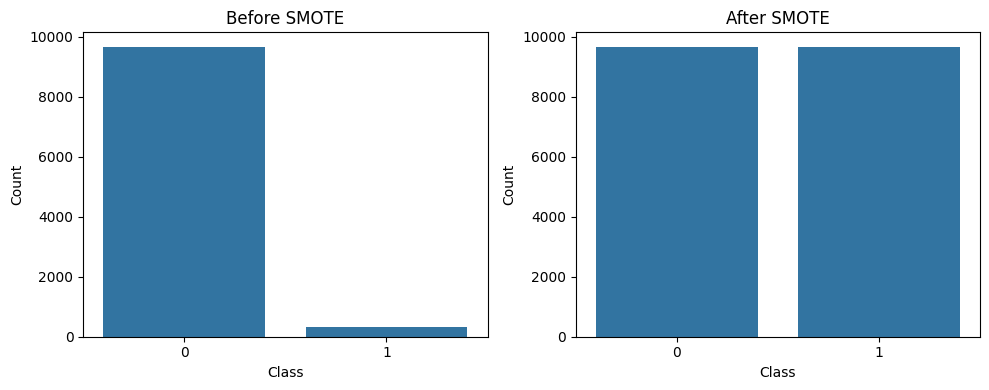

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x=y, ax=axes[0])
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

sns.countplot(x=y_resampled, ax=axes[1])
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
#ouliers using iqr capping
df_work = df_balanced.copy()

# Redefine numeric and categorical columns based on the current df_work
num_cols_updated = df_work.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_updated = df_work.select_dtypes(exclude=[np.number]).columns.tolist()

num_feature_cols = [c for c in num_cols_updated if c != target_col]
print("Numeric feature columns for outlier treatment:", num_feature_cols)


def iqr_cap(df_in, cols, k=1.5):
    df_out = df_in.copy()
    for col in cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        low = Q1 - k * IQR
        high = Q3 + k * IQR
        df_out[col] = df_out[col].clip(lower=low, upper=high)
    return df_out

df_work = iqr_cap(df_work, num_feature_cols, k=1.5)

print("Outliers treated using IQR capping.")
display(df_work.head())

Numeric feature columns for outlier treatment: ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type']
Outliers treated using IQR capping.


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Target
0,1,298.1,308.6,1551,42.8,0,1.0,0
1,1,298.2,308.7,1408,46.3,3,1.0,0
2,1,298.1,308.5,1498,49.4,5,1.0,0
3,1,298.2,308.6,1433,39.5,7,1.0,0
4,1,298.2,308.7,1408,40.0,9,1.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate features and target
X = df_work.drop(columns=[target_col])
y = df_work[target_col]

print("Features to scale:", num_cols)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaling completed using StandardScaler")
display(X_scaled.head())

Features to scale: ['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']
Scaling completed using StandardScaler


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,0.0,-1.209670,-1.178808,0.434029,-0.152260,-1.792156,-0.326955
1,0.0,-1.158395,-1.103147,-0.409379,0.097489,-1.749136,-0.326955
2,0.0,-1.209670,-1.254468,0.121437,0.318695,-1.720456,-0.326955
3,0.0,-1.158395,-1.178808,-0.261930,-0.387737,-1.691776,-0.326955
4,0.0,-1.158395,-1.103147,-0.409379,-0.352059,-1.663096,-0.326955


In [ ]:
# Drop Highly Correlated Features
X_corr = X_scaled.copy()   #excluding target

# Correlation matrix
corr_matrix = X_corr.corr().abs()

# Upper triangle of correlation matrix
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Correlation threshold
corr_threshold = 0.90

# Features to drop
high_corr_features = [
    column for column in upper_triangle.columns
    if any(upper_triangle[column] > corr_threshold)
]

print("Highly correlated features to drop:", high_corr_features)

# Drop
X_uncorrelated = X_corr.drop(columns=high_corr_features)

print("Shape before:", X_corr.shape)
print("Shape after :", X_uncorrelated.shape)


Highly correlated features to drop: ['Torque [Nm]']
Shape before: (19322, 7)
Shape after : (19322, 6)


In [ ]:
# Feature Importance after Correlation-Based Dropping
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_uncorrelated, y)

importances = pd.Series(
    rf.feature_importances_,
    index=X_uncorrelated.columns
).sort_values(ascending=False)

print("Feature importance after dropping correlated features:")
display(importances)

top_features = importances.head(7).index.tolist()
print("\nFinal selected features:", top_features)


Feature importance after dropping correlated features:


,0
Failure Type,0.524625
Rotational speed [rpm],0.260541
Tool wear [min],0.092946
Air temperature [K],0.075786
Process temperature [K],0.046101
Type,0.000000



Final selected features: ['Failure Type', 'Rotational speed [rpm]', 'Tool wear [min]', 'Air temperature [K]', 'Process temperature [K]', 'Type']


In [ ]:
final_features = list(set(top_features).intersection(set(top_features)))

if len(final_features) < 5:
    print("Too few features after intersection using feature importance only")
    final_features = top_features

print("\n Final selected features:")
print(final_features)


 Final selected features:
['Process temperature [K]', 'Type', 'Failure Type', 'Air temperature [K]', 'Tool wear [min]', 'Rotational speed [rpm]']


In [ ]:
# Final dataset
X_final = X_scaled[final_features]
y_final = y.copy()

print("Final feature matrix shape:", X_final.shape)

Final feature matrix shape: (19322, 6)


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix, classification_report
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final
)
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metrics
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc",
    "pr_auc": "average_precision"
}

Train shape: (15457, 6)
Test shape : (3865, 6)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "SVM (RBF)": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

MODEL: Logistic Regression

Cross-validation (mean):
ACCURACY  : 0.8110
PRECISION : 0.7980
RECALL    : 0.8332
F1        : 0.8151
ROC_AUC   : 0.8976
PR_AUC    : 0.8934

Test-set Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1933
           1       0.80      0.82      0.81      1932

    accuracy                           0.81      3865
   macro avg       0.81      0.81      0.81      3865
weighted avg       0.81      0.81      0.81      3865

MODEL: SVM (RBF)

Cross-validation (mean):
ACCURACY  : 0.9702
PRECISION : 0.9869
RECALL    : 0.9530
F1        : 0.9697
ROC_AUC   : 0.9920
PR_AUC    : 0.9924

Test-set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1933
           1       0.98      0.96      0.97      1932

    accuracy                           0.97      3865
   macro avg       0.97      0.97      0.97      3865
weighted av

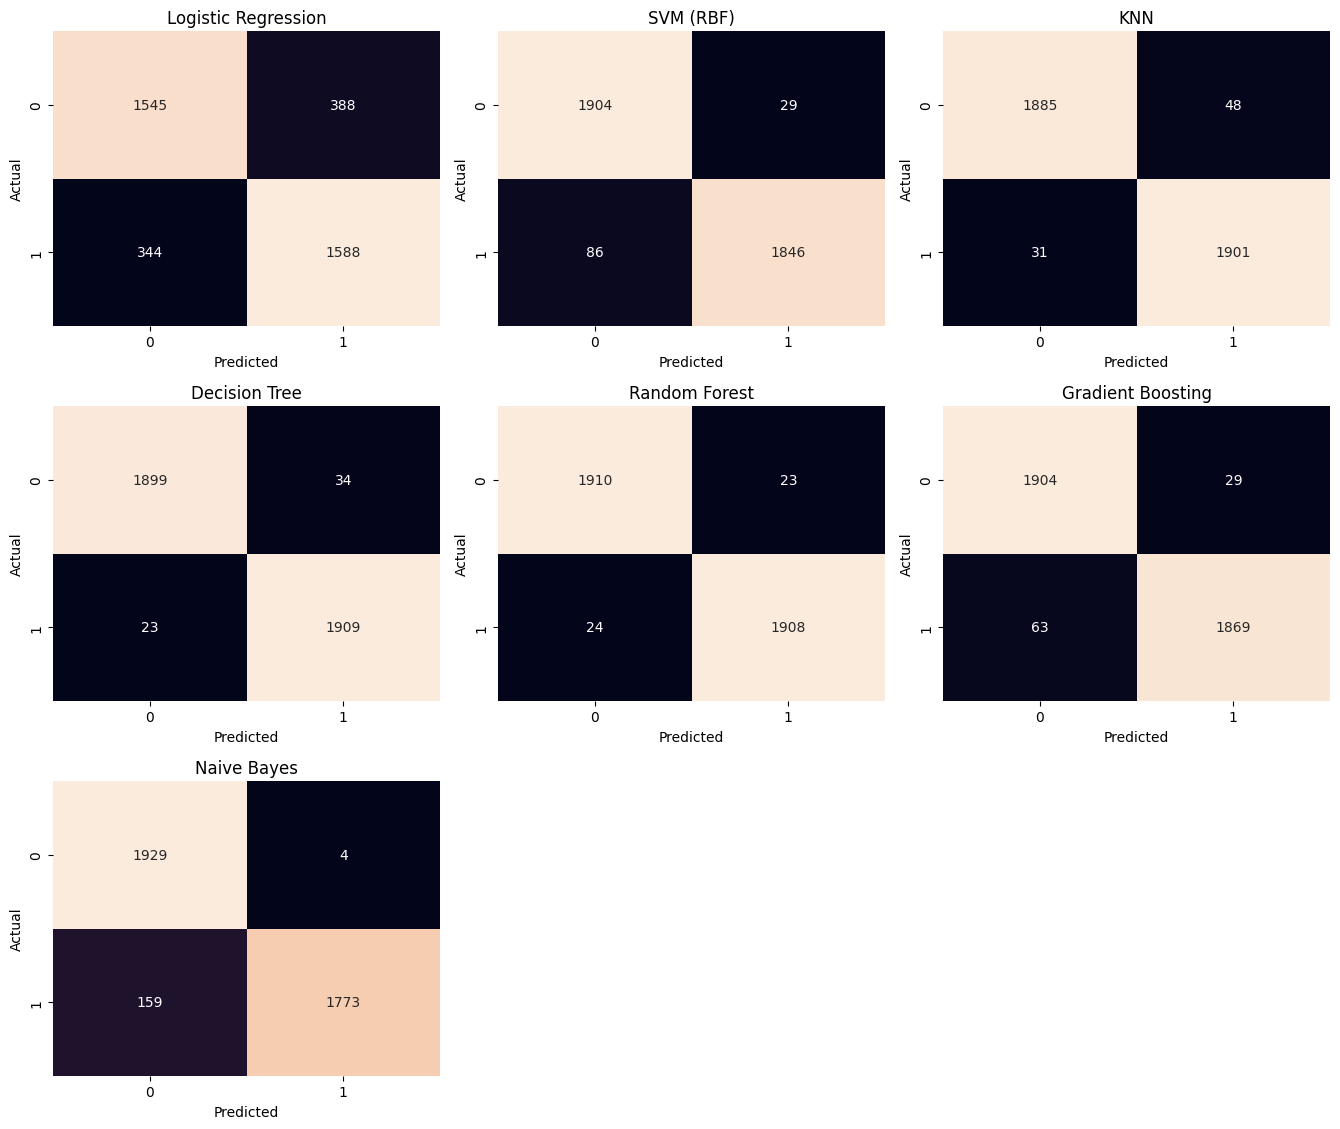



Final Model Comparison (sorted by CV PR-AUC):


,Model,CV Accuracy,CV Precision,CV Recall,CV F1,CV ROC-AUC,CV PR-AUC,Test ROC-AUC,Test PR-AUC
4,Random Forest,0.986284,0.989203,0.983310,0.986241,0.999347,0.999361,0.999349,0.999359
5,Gradient Boosting,0.975415,0.985089,0.965454,0.975165,0.997520,0.997695,0.997336,0.997678
1,SVM (RBF),0.970175,0.986897,0.953033,0.969654,0.992025,0.992416,0.992214,0.991604
2,KNN,0.976774,0.972805,0.980981,0.976872,0.994922,0.992027,0.995195,0.991792
6,Naive Bayes,0.955295,0.998010,0.912407,0.953282,0.986374,0.988494,0.986158,0.988467
3,Decision Tree,0.980915,0.980126,0.981757,0.980929,0.980915,0.971360,0.985253,0.976756
0,Logistic Regression,0.811024,0.797953,0.833223,0.815115,0.897573,0.893443,0.894752,0.888052


In [ ]:
cv_results = []

n_models = len(models)
cols = 3  # number of columns in the grid
rows = int(np.ceil(n_models / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4.5, rows * 3.8))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    print(f"MODEL: {name}")

    # Cross-validation
    scores = cross_validate(
        model, X_train, y_train,
        cv=cv,
        scoring=scoring,
        return_train_score=False
    )

    mean_scores = {k: np.mean(v) for k, v in scores.items() if k.startswith("test_")}
    print("\nCross-validation (mean):")
    for k, v in mean_scores.items():
        print(f"{k.replace('test_', '').upper():<10}: {v:.4f}")

    # Fit and test
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = None

    print("\nTest-set Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix (subplot)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cbar=False,
        ax=axes[idx]
    )
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

    # Metrics
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    pr_auc = average_precision_score(y_test, y_proba) if y_proba is not None else np.nan

    cv_results.append({
        "Model": name,
        "CV Accuracy": np.mean(scores["test_accuracy"]),
        "CV Precision": np.mean(scores["test_precision"]),
        "CV Recall": np.mean(scores["test_recall"]),
        "CV F1": np.mean(scores["test_f1"]),
        "CV ROC-AUC": np.mean(scores["test_roc_auc"]),
        "CV PR-AUC": np.mean(scores["test_pr_auc"]),
        "Test ROC-AUC": roc_auc,
        "Test PR-AUC": pr_auc
    })

# Remove empty subplots (if any)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Results table
results_df = pd.DataFrame(cv_results).sort_values(by="CV PR-AUC", ascending=False)
print("\n\nFinal Model Comparison (sorted by CV PR-AUC):")
display(results_df)


,Model,CV Accuracy,CV Precision,CV Recall,CV F1,CV ROC-AUC,CV PR-AUC,Test ROC-AUC,Test PR-AUC
4,Random Forest,0.986284,0.989203,0.983310,0.986241,0.999347,0.999361,0.999349,0.999359
5,Gradient Boosting,0.975415,0.985089,0.965454,0.975165,0.997520,0.997695,0.997336,0.997678
1,SVM (RBF),0.970175,0.986897,0.953033,0.969654,0.992025,0.992416,0.992214,0.991604
2,KNN,0.976774,0.972805,0.980981,0.976872,0.994922,0.992027,0.995195,0.991792
6,Naive Bayes,0.955295,0.998010,0.912407,0.953282,0.986374,0.988494,0.986158,0.988467
3,Decision Tree,0.980915,0.980126,0.981757,0.980929,0.980915,0.971360,0.985253,0.976756
0,Logistic Regression,0.811024,0.797953,0.833223,0.815115,0.897573,0.893443,0.894752,0.888052


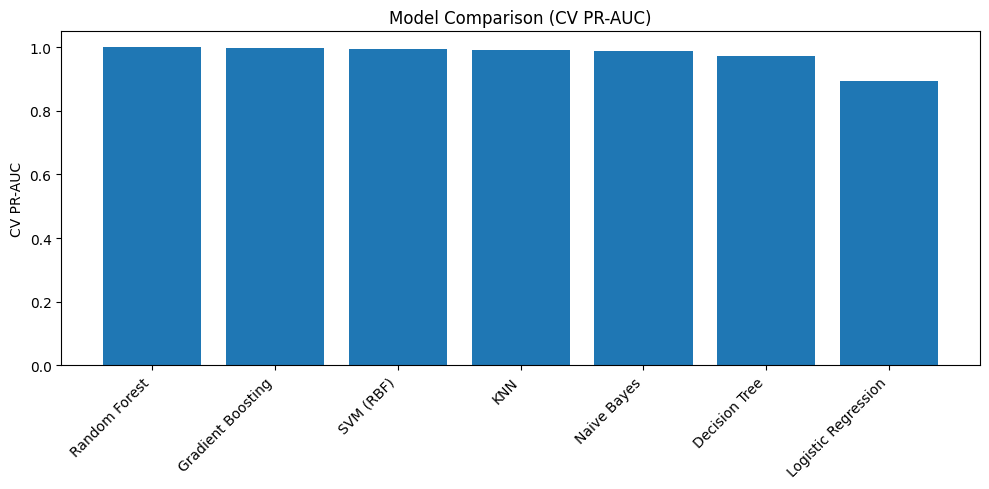

In [ ]:
display(results_df)

plt.figure(figsize=(10, 5))
plt.bar(results_df["Model"], results_df["CV PR-AUC"])
plt.title("Model Comparison (CV PR-AUC)")
plt.ylabel("CV PR-AUC")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print("Best model by CV PR-AUC:", best_model_name)

Best model by CV PR-AUC: Random Forest



Test Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1933
           1       0.99      0.99      0.99      1932

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



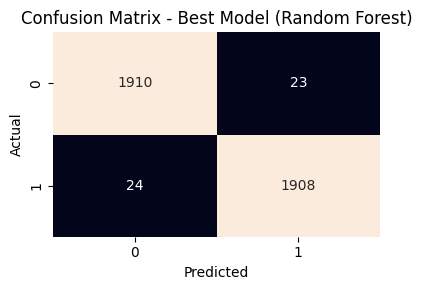

Test ROC-AUC: 0.99934905247103
Test PR-AUC : 0.999358745707292


In [ ]:
#selecting best model + fitting again on it
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_test)[:, 1]
else:
    y_proba = None

print("\nTest Classification Report (Best Model):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title(f"Confusion Matrix - Best Model ({best_model_name})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

if y_proba is not None:
    print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("Test PR-AUC :", average_precision_score(y_test, y_proba))

Top-2 models for tuning: ['Random Forest', 'Gradient Boosting']
TUNING: Random Forest
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 400}
Best CV PR-AUC: 0.9993637094875396

Test Report (Tuned):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1933
           1       0.99      0.99      0.99      1932

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



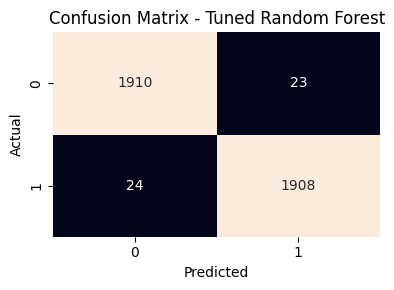

TUNING: Gradient Boosting
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best CV PR-AUC: 0.9987884083640777

Test Report (Tuned):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1933
           1       0.99      0.98      0.98      1932

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865



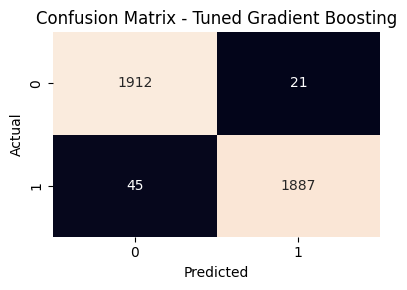


 Tuned Model Results:


,Model,Best Params,Best CV PR-AUC,Test PR-AUC,Test ROC-AUC
0,Random Forest,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.999364,0.999354,0.999342
1,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.998788,0.998561,0.998363


In [ ]:
from sklearn.model_selection import GridSearchCV

top2 = results_df.head(2)["Model"].tolist()
print("Top-2 models for tuning:", top2)

param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l2"],
        "solver": ["lbfgs"]
    },
    "SVM (RBF)": {
        "C": [0.1, 1, 10],
        "gamma": ["scale", 0.01, 0.1]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 11],
        "weights": ["uniform", "distance"]
    },
    "Decision Tree": {
        "max_depth": [None, 3, 5, 10],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [200, 400],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [2, 3]
    },
    "Naive Bayes": {
        # GaussianNB has very few tunable params; leave empty
    }
}

tuned_results = []

for model_name in top2:
    base_model = models[model_name]
    grid = param_grids.get(model_name, {})

    if grid == {}:
        print(f"\n No useful grid for {model_name}. Skipping tuning.")
        continue
    print(f"TUNING: {model_name}")


    gs = GridSearchCV(
        estimator=base_model,
        param_grid=grid,
        scoring="average_precision",   # PR-AUC focus
        cv=cv,
        n_jobs=-1
    )

    gs.fit(X_train, y_train)

    print("Best Params:", gs.best_params_)
    print("Best CV PR-AUC:", gs.best_score_)

    # Evaluate tuned model on test
    tuned_best = gs.best_estimator_
    y_pred = tuned_best.predict(X_test)
    y_proba = tuned_best.predict_proba(X_test)[:, 1] if hasattr(tuned_best, "predict_proba") else None

    print("\nTest Report (Tuned):")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.title(f"Confusion Matrix - Tuned {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    tuned_results.append({
        "Model": model_name,
        "Best Params": gs.best_params_,
        "Best CV PR-AUC": gs.best_score_,
        "Test PR-AUC": average_precision_score(y_test, y_proba) if y_proba is not None else np.nan,
        "Test ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    })

tuned_df = pd.DataFrame(tuned_results).sort_values(by="Best CV PR-AUC", ascending=False)
print("\n Tuned Model Results:")
display(tuned_df)

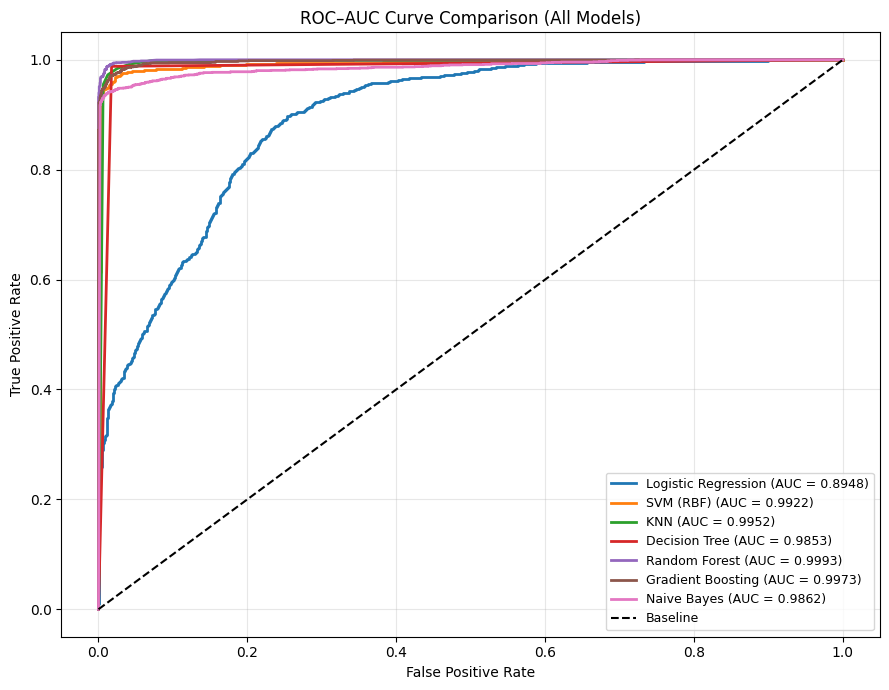

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))

for name, model in models.items():
    model.fit(X_train, y_train)

    # Get probabilities
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        continue  # skip models without probability

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, linewidth=2, label=f"{name} (AUC = {roc_auc:.4f})")

plt.plot([0, 1], [0, 1], "k--", label="Baseline")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve Comparison (All Models)")
plt.legend(loc="lower right", fontsize=9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
